# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Thermostat dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow



In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Thermostat.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Thermostat.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_28 (Conv1D)              │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5002 - loss: 0.6934 - val_accuracy: 0.5476 - val_loss: 0.6928
Epoch 2/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4987 - loss: 0.6942 - val_accuracy: 0.5476 - val_loss: 0.6928
Epoch 3/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4974 - loss: 0.6941 - val_accuracy: 0.6437 - val_loss: 0.6928
Epoch 4/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5050 - loss: 0.6933 - val_accuracy: 0.4195 - val_loss: 0.6929
Epoch 5/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5003 - loss: 0.6936 - val_accuracy: 0.4524 - val_loss: 0.6927
Epoch 6/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5038 - loss: 0.6936 - val_accuracy: 0.4524 - val_loss: 0.6926
Epoch 7/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5121 - loss: 0.6932 - val_accuracy: 0.4524 - val_loss: 0.6926
Epoch 8/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5082 - loss: 0.6934 - val_accuracy: 0.

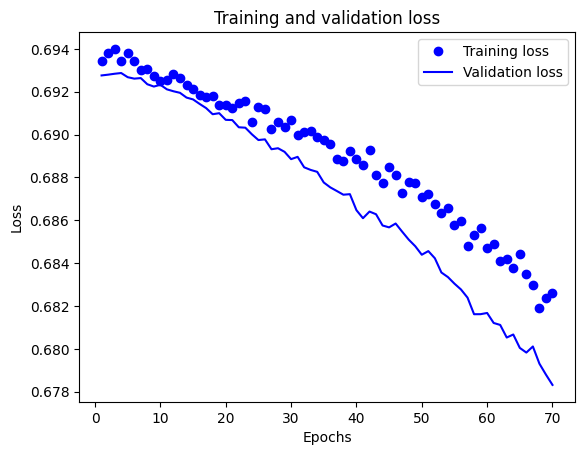

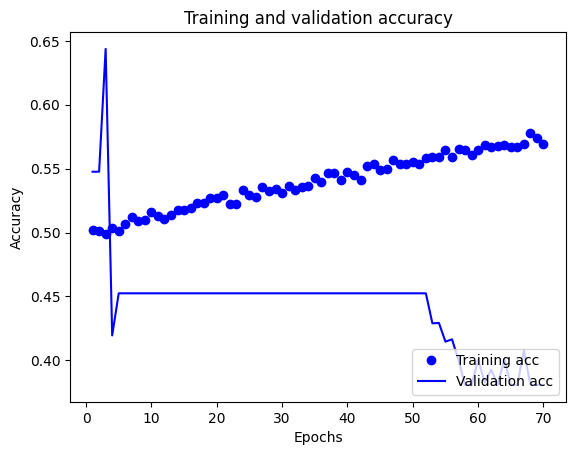


Classification Report
              precision    recall  f1-score   support

           0       0.42      0.80      0.55      1541
           1       0.00      0.00      0.00      1736

    accuracy                           0.38      3277
   macro avg       0.21      0.40      0.27      3277
weighted avg       0.20      0.38      0.26      3277


Confusion Matrix
[[1240  301]
 [1736    0]]


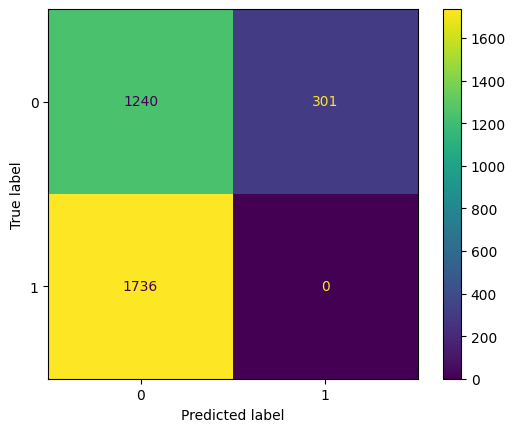

Time taken: 154.3953 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])


#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

#Dense Layer encoder
DENSE_ENCODER = LabelEncoder()
DENSE_ENCODER.fit([5, 8, 10])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20, c1=0.18, c2=0.82)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

INFO:mealpy.swarm_based.FOX.OriginalFOX:Solving single objective optimization problem.


Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.6098230481147766
Accuracy 0.4463087320327759
Accuracy 0.3913971781730652
Accuracy 0.5475899875164032
Accuracy 0.09121417999267578
Accuracy 0.4524099826812744
Accuracy 0.08633315563201904
Accuracy 0.08633315563201904
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.440512478351593
Accuracy 0.40237951278686523
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.6192800402641296
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08633315563201904
Accuracy 0.09792554378509521
Accuracy 0.5475899875164032
Accuracy 0.08785843849182129
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.09548503160476685
Accuracy 0.4524099826812744
Accuracy 0

INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 1, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 961.81387 seconds


Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.38987189531326294
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 2, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1065.51626 seconds


Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.11683952808380127
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5482001304626465
Accuracy 0.09182429313659668
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 3, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1039.21379 seconds


Accuracy 0.08633315563201904
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.6220256388187408
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.105857253074646
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.08999389410018921
Accuracy 0.4524099826812744
Accuracy 0.11653447151184082


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 4, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 998.48296 seconds


Accuracy 0.5475899875164032
Accuracy 0.08633315563201904
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08663821220397949
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 5, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1175.93298 seconds


Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.09029895067214966
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 6, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1035.00342 seconds


Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 7, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1121.93072 seconds


Accuracy 0.4524099826812744
Accuracy 0.2626601457595825
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08602803945541382
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.08785843849182129
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 8, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1134.14510 seconds


Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5576571226119995
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4008541703224182
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.10372179746627808
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 9, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1028.24832 seconds


Accuracy 0.5344722270965576
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.08633315563201904
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08724832534790039
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 10, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1070.07788 seconds


Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.09304451942443848
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08968883752822876
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.11653447151184082
Accuracy 0.08602803945541382
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 11, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1047.31710 seconds


Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.08755338191986084
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 12, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1067.05957 seconds


Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08633315563201904
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 13, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1049.74467 seconds


Accuracy 0.14307504892349243
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.08816349506378174
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08724832534790039
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.12995731830596924
Accuracy 0.4524099826812744
Accuracy 0.2361195683479309
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 14, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 1011.43103 seconds


Accuracy 0.4524099826812744
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.08633315563201904
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.08572298288345337
Accuracy 0.08572298288345337
Accuracy 0.5475899875164032
Accuracy 0.5475899875164032
Accuracy 0.4524099826812744
Accuracy 0.19005489349365234
Accuracy 0.588773638010025
Accuracy 0.4524099826812744
Accuracy 0.4524099826812744
Accuracy 0.08572298288345337


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 15, Current best: 0.08572298288345337, Global best: 0.08572298288345337, Runtime: 994.55036 seconds


Accuracy 0.46064674854278564
Solution: [1.17001927 3.73610568 5.62120116 0.52028517 2.72846769], Fitness: 0.08572298288345337
Solution: [1.17001927 3.73610568 5.62120116 0.52028517 2.72846769], Fitness: 0.08572298288345337


Accuracy 0.46064674854278564
Solution: [1.17001927 3.73610568 5.62120116 0.52028517 2.72846769], Fitness: 0.08572298288345337


Batch Size - 32, **64**, 128

Activation - softmax, softplus, relu, **tanh**, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, **0.1**

Filters - **25**, 50, 75

Hidden Units - 400, 512, **640**

Model: "sequential_350"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_350 (Conv1D)             │ (None, 2, 25)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_350               │ (None, 1, 25)          │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_700 (Dropout)           │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_350         │ (None, 1, 25)          │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_350 (LSTM)                 │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_350 (Flatten)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_700 (Dense)               │ (None, 640)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_701 (Dropout)           │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_701 (Dense)               │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,481 (255.79 KB)

 Trainable params: 65,431 (255.59 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5522 - loss: 0.6837 - val_accuracy: 0.4240 - val_loss: 0.6424
Epoch 2/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6565 - loss: 0.6243 - val_accuracy: 0.6123 - val_loss: 0.5236
Epoch 3/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7323 - loss: 0.5248 - val_accuracy: 0.7328 - val_loss: 0.4956
Epoch 4/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8625 - loss: 0.3426 - val_accuracy: 0.9137 - val_loss: 0.4943
Epoch 5/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9309 - loss: 0.1848 - val_accuracy: 0.9143 - val_loss: 0.7622
Epoch 6/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9571 - loss: 0.1186 - val_accuracy: 0.9143 - val_loss: 0.9096
Epoch 7/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.0967 - val_accuracy: 0.9143 - val_loss: 1.0571
Epoch 8/70
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9705 - loss: 0.0871 - val_accuracy: 0.

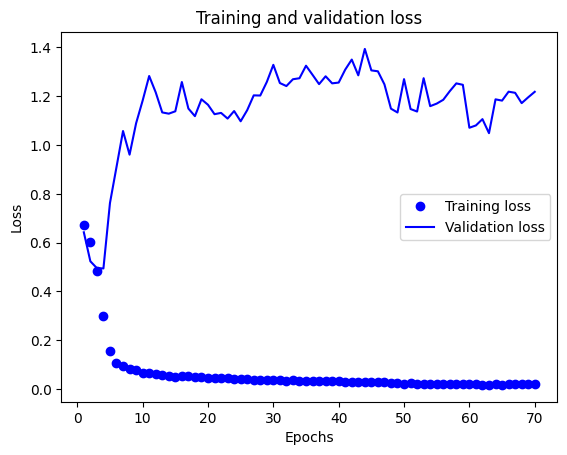

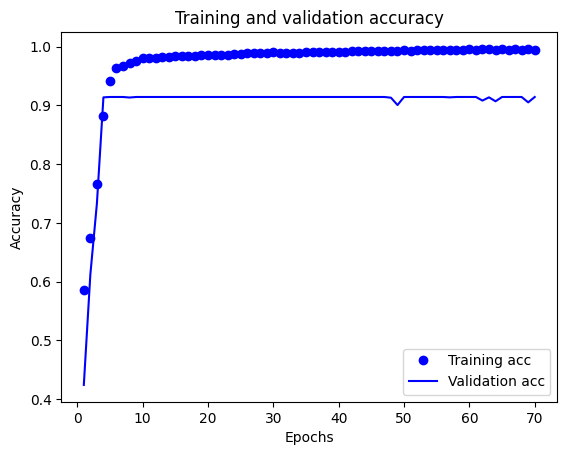


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      1541
           1       0.83      1.00      0.91      1736

    accuracy                           0.89      3277
   macro avg       0.92      0.89      0.89      3277
weighted avg       0.91      0.89      0.89      3277


Confusion Matrix
[[1198  343]
 [   5 1731]]


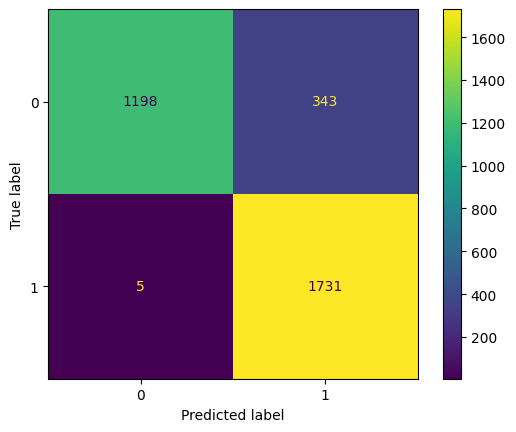

Time taken: 159.2249 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(640, activation='tanh'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")